# Анализ пограммы лояльности в сети строительных магазинов

#### Материалы 

[Презентация](https://drive.google.com/file/d/1Ybwn_dYmRaWQbqpIHX5bcZuRcoZPtDwP/view?usp=sharing)

[Дашборд](https://public.tableau.com/views/Final_dashboard_16535965523450/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link)
 

**Описание проекта**

Заказчик данного исследования - сеть магазинов строительных материалов. В сети действует система скидок, специальных предложений и подарков для клиентов, стать участниками этой системы они могут за 200 рублей в месяц с использованием персональных карт.

Наша задача проанализировать действующую в магазине программу лояльности.

**Задачи проекта**

**1. Предобработка данных** 

 1.1. Загрузка данных и изучение общей информации

  1.2. Обработка типов данных

  1.3. Проверка наличия пропусков и дуликатов

**2. Исследовательский анализ данных** 

 2.1. Определить, данными за какой период мы располагаем

 2.2. Объединение датафреймов retail_dataset и product_codes

 2.3. Расчет основных метрик
 
  Для всей сети без магазина shop 0 в разрезе покупатель участвует в программме лояльности/не участвует:
  
  - Общий объем продаж (выручка);
  
  - Количество покупок;
  
  - Средний чек;
  
  - Средняя выручка на 1 покупателя;
  
  - Среднее количество покупок в неделю на 1 покупателя;
     
  Для  магазина shop 0 в разрезе покупатель участвует в программме лояльности/не
  участвует:
  
  
  - Средний чек;
  
  - Средняя выручка на 1 покупателя;
  
  - Среднее количество покупок на 1 покупателя;
    
  - Количество покупателей.

 2.4. Динамика среднего чека

 2.5. Динамика количества покупок на 1 клиента

**3. Статистический анализ данных** 

 3.1. Сформулировать и проверить статистические гипотезы о равенстве продаж для лояльных/
 нелояльных покупателей
 

**4. Выводы**. Подвести итоги исследования, сделать выводы об эффективности программы лояльности, дать возможные рекомендации отделу маркетинга

**Исходные данные**

Файл retail_dataset.csv:

- `purchaseId` — id чека;
- `item_ID` — id товара;
- `purchasedate` — дата покупки;
- `Quantity` — количество товара;
- `CustomerID` — id покупателя;
- `ShopID` — id магазина;
- `loyalty_program` — участвует ли покупатель в программе лояльности;

Файл product_codes.csv:

- `productID` — id товара;
- `price_per_one` — стоимость одной единицы товара;

## 1. Предобработка данных

### 1.1. Загрузка данных и изучение общей информации

In [1]:
# импорт библиотек
import pandas as pd
import datetime as dt
import warnings
import scipy.stats as stats
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [2]:
# чтение файлов с данными и запись в соответствующие переменные
retail, product = (
pd.read_csv('retail_dataset.csv'), 
pd.read_csv('product_codes.csv')
)

# выведем на экран датафреймы, чтобы познакомиться  с данными
display(retail.head(5), product.head(5))

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


Для удобства переименуем столбец item_ID датасета retail, чтобы в дальнейшем произвести объединение с датасетом product

In [3]:
retail = retail.rename(columns={'item_ID':'productID'})

Посмотрим на распределение значений в каждом столбце


In [4]:
# список столбцов датафрейма retail
columns_name = retail.columns

# пройдеммся циклом по каждому столбцу и применим метод describe() для описнаия распределения значений
[retail[i].describe() for i in columns_name]

[count     105335
 unique      4894
 top       537434
 freq         675
 Name: purchaseid, dtype: object,
 count     105335
 unique      3159
 top       85123A
 freq         565
 Name: productID, dtype: object,
 count    105335.000000
 mean          7.821218
 std         327.946695
 min      -74216.000000
 25%           0.000000
 50%           2.000000
 75%           7.000000
 max       74214.000000
 Name: Quantity, dtype: float64,
 count                  105335
 unique                   4430
 top       2016-12-06 16:57:00
 freq                      675
 Name: purchasedate, dtype: object,
 count    69125.000000
 mean     21019.302047
 std       1765.444679
 min      18025.000000
 25%      19544.000000
 50%      20990.000000
 75%      22659.000000
 max      23962.000000
 Name: CustomerID, dtype: float64,
 count     105335
 unique        31
 top       Shop 0
 freq       97393
 Name: ShopID, dtype: object,
 count    105335.000000
 mean          0.226345
 std           0.418467
 min       

In [5]:
# посмотрим на распределение значений по столбцу 'price_per_one' датафрейма product
product['price_per_one'].describe()


count     9969.000000
mean        19.503697
std        330.880754
min          0.000000
25%          1.250000
50%          2.550000
75%          5.510000
max      16888.020000
Name: price_per_one, dtype: float64

<AxesSubplot:>

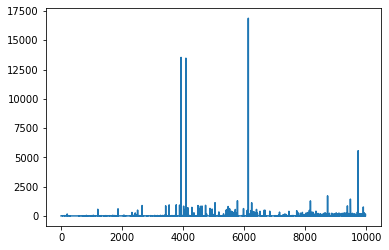

In [6]:
product['price_per_one'].plot()

Видим, что в столбце с количеством товара ('Quantity') четверть значений нулевые, это больше похоже на ошибку в данных, т.к. при бесплатной, например, передаче товара указывается нулевая сумма, а наименование и количество товара являются обязательными реквизитами чека. Удалим строки с нулевым количеством товара, т.к. на расчет выручки это никак не повлияет (при умножении цены товара на 0 будет 0), а подсчет количества покупок не будет искажен, если будут чеки только с позициями с нулевым количеством товара. 
Также минимальные и максимальные значения (-74216 и 74214) будем считать аномалиями и также уберем из анализа.
А вот из датафрейма с ценами "аномальные" значения, которые за пределами 4-го квартиля удалять не будем,т.к. максимальная цена 16888 руб. за единицу товара вполне реальная история и такие даже редкие покупки могут значительно влиять на эффективность магазина.

На графике распределения значений цен есть 4 сильно выбивающихся значения, очистим данные от них, чтобы они не искажали результаты.

In [7]:
# исключим из датафрейма retail строки с Quantity==0 и аномалии
retail_2 = retail.query('Quantity!=0 and Quantity!=-74216 and Quantity!=74214')

product = product.query('price_per_one < 2500')


### 1.2. Обработка типов данных

In [8]:
# выведем общую информацию о данных, чтобы убедиться, что тип данных во всех колонках соотвествующий
display(retail_2.info())
display(product.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72278 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   purchaseid       72278 non-null  object 
 1   productID        72278 non-null  object 
 2   Quantity         72278 non-null  int64  
 3   purchasedate     72278 non-null  object 
 4   CustomerID       55971 non-null  float64
 5   ShopID           72278 non-null  object 
 6   loyalty_program  72278 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 4.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9961 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9961 non-null   object 
 1   price_per_one  9961 non-null   float64
dtypes: float64(1), object(1)
memory usage: 233.5+ KB


None

Явно потребуется заменить тип для для столбца с датами  - purchasedate датафрейма retail в формат  datetime

In [9]:
# преобразование в формат datetime
retail_2['purchasedate'] = pd.to_datetime(retail_2['purchasedate'])



/tmp/ipykernel_43/1606335224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_2['purchasedate'] = pd.to_datetime(retail_2['purchasedate'])



### 1.3. Проверка наличия пропусков и дуликатов

In [10]:
# проверка пропусков методом isna()
display(retail_2.isna().sum()) 
display(product.isna().sum())

purchaseid             0
productID              0
Quantity               0
purchasedate           0
CustomerID         16307
ShopID                 0
loyalty_program        0
dtype: int64

productID        0
price_per_one    0
dtype: int64

Много пропущенных значений в столбце  id покупателя (CustomerID), похожу на то, что это те покупатели, которые не участвуют в программе лояльнсти, проверим это предположение - подсчитаем сумму значений по столбцу 'loyalty_program' для всех позиций, для которых id покупателя пропущено:         

In [11]:
# подсчитаем сумму по столбцу loyalty_program
retail_2.loc[retail_2['CustomerID'].isna()] ['loyalty_program'].sum()

0.0

Т.к. 1 означает, что покупатель участвует в программе лояльности, а о - не участвует, а при подсчете суммы у нас получился результат равный 0, значит среди позиций с пропущенными значениями id покупателя нет покупателей, участвующих в программе лояльности. В данном случае эти пропуски - не ошибки в данных, удалять или заменять мы их не будем.

In [12]:
# подсчет дубликатов
display(retail_2.duplicated().sum())
display(product.duplicated().sum())

340

0

В датафрейме retail 340 дубликата, но т.к. строки в данном фрейме - это товары, то вполне возможно, что кассир просто таким образом пробивал покупки, поэтому не будем ничего удалять. 

## 2. Исследовательский анализ данных

### 2.1. Период данных

In [13]:
# определение минимальной и максимальной даты
display(retail_2['purchasedate'].min())
display(retail_2['purchasedate'].max())

Timestamp('2016-12-01 08:26:00')

Timestamp('2017-02-28 17:04:00')

Данные о покупках в датасете даны за 3 месяца - с 1 декабря 2016 года по 28 февраля 2017 года.

### 2.2. Объединение датафреймов retail_dataset и product_codes

Для дальнейших расчетов нам потребуется объединить датасеты retail и product

In [14]:
# проверка на уникальность id товаров
product['productID'].duplicated().sum()

6802

Видим, что в таблице product id товара моежет соответствовать несколько вариантов цены, поэтому перед объединением фреймов нужно будет в product произвести группировку по id товара, чтобы получить пару: уникальный id товара - цена. 

Возьмем среднее значение цены, т.к. за 3 месяца цена менялась скорее всего совсем не значительно,а имеющиеся 

In [15]:
product_grouped = product.pivot_table(index='productID', values='price_per_one', aggfunc='median').reset_index()
product_grouped.head()

,productID,price_per_one
0,10002,1.63
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


In [16]:
# объединение датасетов
data_full = pd.merge(retail_2, product_grouped, how='left', on='productID')
data_full.head()

,purchaseid,productID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0,1.630
1,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0,1.630
2,541424,79321,1,2017-01-17 17:57:00,NaN,Shop 0,0.0,5.750
3,537795,82494L,5,2016-12-08 13:03:00,22892.0,Shop 0,1.0,5.205
4,541696,22197,4,2017-01-20 18:08:00,NaN,Shop 0,0.0,1.240


### 2.3. Основные метрики

Чтобы проследить закономерности в данных анализировать будем показатели отдельно для покупателей, участвующих в программе лояльности и для тех, кто не участвует.

#### 2.3.1. Общий объем продаж

Для начала посмотрим на общий объем продаж - посчитаем выручку.

In [17]:
# добавление столбца с выручкой
data_full['revenue'] = data_full['Quantity'] * data_full['price_per_one']
# общая выручка по всем клиентам сети
data_full['revenue'].sum()

2165246.895

In [18]:
# выручка по клиентам без id
data_full.loc[data_full['CustomerID'].isna()]['revenue'].sum() 

172690.18

In [19]:
# доля выручки клиентов без id
wo_id_share = round((data_full.loc[data_full['CustomerID'].isna()]['revenue'].sum() / data_full['revenue'].sum()*100),2)
wo_id_share

7.98

Выручка по клиентам без id всего 2% от общего объема продаж, поэтому не будем исключать этих клиентов из расчетов - на результат эти данные все равно не повлияют.

In [20]:
# группировка по 'loyalty_program'
rev_per_lp = data_full.pivot_table(index='loyalty_program', values='revenue', aggfunc='sum').reset_index()
rev_per_lp

,loyalty_program,revenue
0,0.0,1591385.375
1,1.0,573861.520


Общий объем выручки за 3 месяца для клиентов, не участвующих в программе лояльности стоставил 1,6 млн.руб., а для участвующих - почти в 2 раза меньше 574 тыс.руб. Пока результат выглядит неожиданно, но мы еще не посмотрели на соотношение количества покупателей в этих группах,возможно, большинство покупателей не участвует в программе лояльности.

Посмотрим, как распределена выручка по магазинам сети.

In [21]:
# группировка выручки по мазазинам
shop_share = data_full.pivot_table(index='ShopID', values='revenue', aggfunc='sum').reset_index()
shop_share['revenue_percent'] = round((shop_share['revenue'] / shop_share['revenue'].sum()*100),2)
shop_share.sort_values('revenue_percent', ascending=False)

,ShopID,revenue,revenue_percent
0,Shop 0,1742143.950,80.46
23,Shop 3,101963.465,4.71
27,Shop 6,55936.820,2.58
25,Shop 4,50635.565,2.34
1,Shop 1,48030.905,2.22
12,Shop 2,39485.245,1.82
6,Shop 14,22153.325,1.02
29,Shop 8,16971.025,0.78
28,Shop 7,11233.930,0.52
11,Shop 19,10249.600,0.47


Практически 80% продаж приходится на магазин Shop 0. 

#### 2.3.2. Количество покупок

Посчитаем общее количество покупок для этих групп клиентов, за 1 покупку будем принимать 1 чек.

In [22]:
# расчет количества покупок
data_total_purh = data_full.pivot_table(index='loyalty_program', values='purchaseid', aggfunc='nunique').reset_index()
data_total_purh

,loyalty_program,purchaseid
0,0.0,3396
1,1.0,1331


In [23]:
data_full['purchaseid'].duplicated().sum()

67551

Покупатели, не участвующие в программе лояльности совершили больше чем в 2 раза больше покупок. чем не участвующие.
Самое время посмотреть на количество покупателей в этих группах.

In [24]:
# выведем уникальные значения столбца 'loyalty_program'
data_full['loyalty_program'].unique()

array([0., 1.])

In [26]:
data_full.pivot_table(index='loyalty_program', values='CustomerID', aggfunc='nunique').reset_index()

,loyalty_program,CustomerID
0,0.0,1155
1,1.0,584


 Число пользователей, не участвующих в программе лояльности,даже без учета пользователей без id, а их 23% и они также не в программе лояльности примерно в 2 раза превышает количесвто пользователей, участвующих в программе, отсюда и превышение в объемах выручки по ним, поэтому для дальнейшего анализа будем рассчитывать относительные показатели, т.к. по ним уже можно будет судить об эффективности. И т.к. основной объем продаж проходит через магазин Shop0, то посчитаем метрики отдельно для него и для сети без него.

#### 2.3.3. Расчет метрик для сети без магазина Shop 0

**Средний чек**

Чтобы рассчитать средний чек разделим выручку на количество чеков по покупателям лояльным и нелояльным, для этого сначала сгруппируем датафрейм по "loyalty_program", подсчитаем уникальное количество чеков и проссумируем по ним выручку.

In [27]:
avg_check = data_full.query('ShopID != "Shop 0"').pivot_table(
    index='loyalty_program',values=['purchaseid', 'revenue'], 
    aggfunc={'purchaseid':'nunique', 'revenue':'sum'}).reset_index()
    
avg_check['avg_purchas'] = avg_check['revenue'] / avg_check['purchaseid']
avg_check

,loyalty_program,purchaseid,revenue,avg_purchas
0,0.0,411,412224.530,1002.979392
1,1.0,7,10878.415,1554.059286


Средний чек у покупателей, участвующих в прогррамме лояльности на 55% выше, чем для нелояльных покупателей.

**Средняя выручка на 1 покупателя**

In [28]:
avg_rev_per_cust = data_full.query('ShopID != "Shop 0"').pivot_table(
    index='loyalty_program',values=['CustomerID', 'revenue'], 
    aggfunc={'CustomerID':'nunique', 'revenue':'sum'}).reset_index()
    
avg_rev_per_cust['avg_rev'] = avg_rev_per_cust['revenue'] / avg_rev_per_cust['CustomerID']
avg_rev_per_cust

,loyalty_program,CustomerID,revenue,avg_rev
0,0.0,173,412224.530,2382.800751
1,1.0,3,10878.415,3626.138333


На 1 покупателя, участвующего в программе лоядьности приходится на 55% выручки больше

**Среднее количество покупок на 1 покупателя**

In [29]:
avg_purch = data_full.query('ShopID != "Shop 0"').pivot_table(
    index='loyalty_program',values=['purchaseid', 'CustomerID'], 
    aggfunc={'purchaseid':'nunique', 'CustomerID':'nunique'}).reset_index()
    
avg_purch['avg_purchas'] = avg_purch['purchaseid'] / avg_purch['CustomerID']
avg_purch

,loyalty_program,CustomerID,purchaseid,avg_purchas
0,0.0,173,411,2.375723
1,1.0,3,7,2.333333


Покупатели, не участвующие в программе лояльности в среднем за месяц совершают такое же количество покупок как и те, кто участвует.

### 2.3.4. Метрики магазина Shop 0.


**Средний чек в магазине Shop 0**

In [30]:
# фильтр по магазинам
data_Shop_0 = data_full.query('ShopID=="Shop 0"')
# группировка по лояльным/нелояльным клиентам
avg_check_Shop_0 = data_Shop_0.pivot_table(
    index='loyalty_program',values=['purchaseid', 'revenue'], 
    aggfunc={'purchaseid':'nunique', 'revenue':'sum'}).reset_index()
    
avg_check_Shop_0['avg_purchas'] = avg_check_Shop_0['revenue'] / avg_check_Shop_0['purchaseid']
avg_check_Shop_0

,loyalty_program,purchaseid,revenue,avg_purchas
0,0.0,2985,1179160.845,395.028759
1,1.0,1324,562983.105,425.213826


Средний чек по покупателям в программе лояльности превышает на 8% значение среднего чека для нелояльных клиентов.

**Среднее выручка на 1 покупателя в магазине Shop 0**

In [31]:
avg_rev_per_cust_Shop_0 = data_Shop_0.pivot_table(
    index='loyalty_program',values=['CustomerID', 'revenue'], 
    aggfunc={'CustomerID':'nunique', 'revenue':'sum'}).reset_index()
    
avg_rev_per_cust_Shop_0['avg_rev'] = avg_rev_per_cust_Shop_0['revenue'] / avg_rev_per_cust_Shop_0['CustomerID']
avg_rev_per_cust_Shop_0

,loyalty_program,CustomerID,revenue,avg_rev
0,0.0,982,1179160.845,1200.774791
1,1.0,581,562983.105,968.989854


На одного покупателя в программе лояльности в магазине Shop 0 приходится на 19% выручки меньше, чем на покупателей, не участвующих в программе.

**Среднее количество покупок на 1 покупателя в магазине Shop 0**

In [32]:
avg_purch_Shop_0 = data_Shop_0.pivot_table(
    index='loyalty_program',values=['purchaseid', 'CustomerID'], 
    aggfunc={'purchaseid':'nunique', 'CustomerID':'nunique'}).reset_index()
    
avg_purch_Shop_0['avg_purchas'] = avg_purch_Shop_0['purchaseid'] / avg_purch_Shop_0['CustomerID']
avg_purch_Shop_0

,loyalty_program,CustomerID,purchaseid,avg_purchas
0,0.0,982,2985,3.039715
1,1.0,581,1324,2.278830


Количество покупок на 1 клиента для покупателей, не участвующих в программе лояльности больше.

**Количество покупателей в магазине Shop 0**

In [33]:
data_Shop_0.pivot_table(index='loyalty_program', values='CustomerID', aggfunc='nunique')

,CustomerID
loyalty_program,
0.0,982
1.0,581



В магазине Shop 0 в программе лояльности участвуют только 37% покупателей.

Основными метриками эффективности программы лояльности будем считать средний чек и количество покупок на 1 клиента.
Посмотрим на них в динамике.

#### 2.3.5. Динамика среднего чека для сети без Shop 0

In [34]:
# округление даты до дней
data_full['purchasedate'] = data_full['purchasedate'].dt.round('1D')

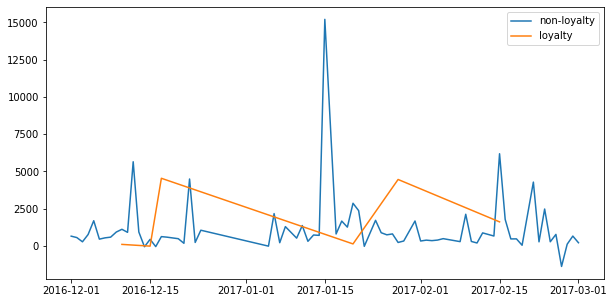

In [37]:
# группировка данных
df_0 = data_full.query('loyalty_program==False and ShopID!="Shop 0"').pivot_table(index='purchasedate', values=['purchaseid', 'revenue'],aggfunc={'purchaseid':'nunique', 'revenue':'sum'})
df_0['avg_check'] = df_0['revenue'] / df_0['purchaseid']
df_0 = df_0.drop(['purchaseid', 'revenue'], axis=1)

df_1 = data_full.query('loyalty_program==True and ShopID!="Shop 0"').pivot_table(index='purchasedate', values=['purchaseid', 'revenue'],aggfunc={'purchaseid':'nunique', 'revenue':'sum'})
df_1['avg_check'] = df_1['revenue'] / df_1['purchaseid']
df_1 = df_1.drop(['purchaseid', 'revenue'], axis=1)

# вывод графика
fig = plt.figure(figsize=(10,5))
plt.plot(df_0, label="non-loyalty")
plt.plot(df_1, label="loyalty")
plt.legend(loc="upper right");

Средний чек колеблется примерно в равных диапазонах для обоих групп клиентов, для нелояльных клиентов можно заметить пиковое значение в середине января, но это, видимо, разовая крупная покупка.


#### 2.3.6. Динамика среднего чека для shop 0

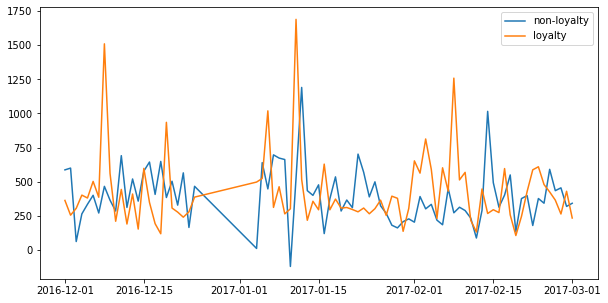

In [39]:
df_0_sh0 = data_full.query('loyalty_program==False and ShopID=="Shop 0"').pivot_table(index='purchasedate', values=['purchaseid', 'revenue'],aggfunc={'purchaseid':'nunique', 'revenue':'sum'})
df_0_sh0['avg_check'] = df_0_sh0['revenue'] / df_0_sh0['purchaseid']
df_0_sh0 = df_0_sh0.drop(['purchaseid', 'revenue'], axis=1)

df_1_sh0 = data_full.query('loyalty_program==True and ShopID=="Shop 0"').pivot_table(index='purchasedate', values=['purchaseid', 'revenue'],aggfunc={'purchaseid':'nunique', 'revenue':'sum'})
df_1_sh0['avg_check'] = df_1_sh0['revenue'] / df_1_sh0['purchaseid']
df_1_sh0 = df_1_sh0.drop(['purchaseid', 'revenue'], axis=1)



# df_0.plot()
# df_1.plot()
# plt.show()

fig = plt.figure(figsize=(10,5))
plt.plot(df_0_sh0, label="non-loyalty")
plt.plot(df_1_sh0, label="loyalty")
plt.legend(loc="upper right");

Средний чек участников программы лояльности колеблется примерно в тех же пределах, что и для покупателей, которые не в программе.

#### 2.3.7. Динамика среднего чека для сети без shop 0

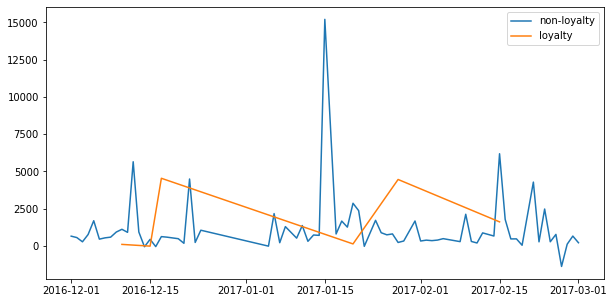

In [40]:
df_0_2 = data_full.query('loyalty_program==False and ShopID!="Shop 0"').pivot_table(index='purchasedate', values=['purchaseid', 'revenue'],aggfunc={'purchaseid':'nunique', 'revenue':'sum'})
df_0_2['avg_check'] = df_0_2['revenue'] / df_0_2['purchaseid']
df_0_2 = df_0_2.drop(['purchaseid', 'revenue'], axis=1)

df_1_2 = data_full.query('loyalty_program==True and ShopID!="Shop 0"').pivot_table(index='purchasedate', values=['purchaseid', 'revenue'],aggfunc={'purchaseid':'nunique', 'revenue':'sum'})
df_1_2['avg_check'] = df_1_2['revenue'] / df_1_2['purchaseid']
df_1_2 = df_1_2.drop(['purchaseid', 'revenue'], axis=1)



# df_0.plot()
# df_1.plot()
# plt.show()

fig = plt.figure(figsize=(10,5))
plt.plot(df_0_2, label="non-loyalty")
plt.plot(df_1_2, label="loyalty")
plt.legend(loc="upper right");

#### 2.3.8. Динамика количества покупок на 1 клиента в магазине shop 0

In [41]:
data_full['week'] = data_full['purchasedate'].dt.week


/tmp/ipykernel_43/3072485729.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data_full['week'] = data_full['purchasedate'].dt.week


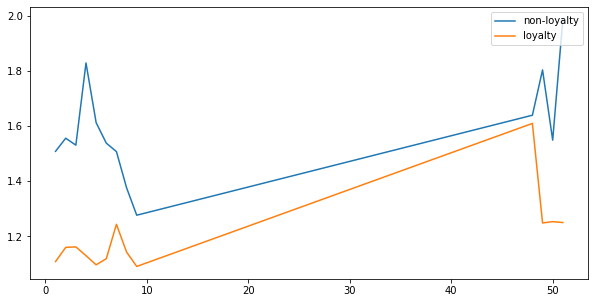

In [42]:
# группировка данных
dp_0 = data_full.query('loyalty_program==False and ShopID=="Shop 0"').pivot_table(index='week', values=['purchaseid', 'CustomerID'],aggfunc={'purchaseid':'nunique','CustomerID':'nunique' })
dp_0['avg_purch'] = dp_0['purchaseid'] / dp_0['CustomerID']

dp_1 = data_full.query('loyalty_program==True and ShopID=="Shop 0"').pivot_table(index='week', values=['purchaseid', 'CustomerID'],aggfunc={'purchaseid':'nunique','CustomerID':'nunique' })
dp_1['avg_purch'] = dp_1['purchaseid'] / dp_1['CustomerID']


# вывод графика
fig = plt.figure(figsize=(10,5))
plt.plot(dp_0['avg_purch'], label="non-loyalty")
plt.plot(dp_1['avg_purch'], label="loyalty")
plt.legend(loc="upper right");

В течении недели не лояльные покупатели совершают чуть больше покупок, чем те, кто участвует в программе лояльности.

#### 2.3.9. Динамика количества покупок на 1 клиента в магазинах сети кроме shop 0

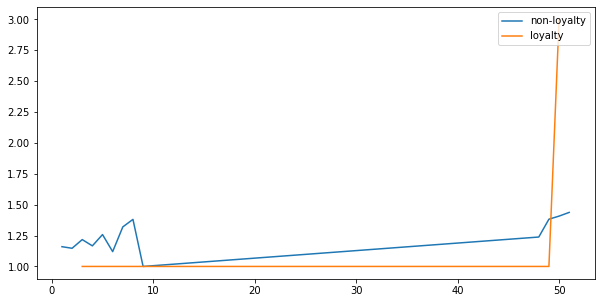

In [43]:
# группировка данных
dp_2 = data_full.query('loyalty_program==False and ShopID!="Shop 0"').pivot_table(index='week', values=['purchaseid', 'CustomerID'],aggfunc={'purchaseid':'nunique','CustomerID':'nunique' })
dp_2['avg_purch'] = dp_2['purchaseid'] / dp_2['CustomerID']

dp_3 = data_full.query('loyalty_program==True and ShopID!="Shop 0"').pivot_table(index='week', values=['purchaseid', 'CustomerID'],aggfunc={'purchaseid':'nunique','CustomerID':'nunique' })
dp_3['avg_purch'] = dp_3['purchaseid'] / dp_3['CustomerID']

# вывод графика
fig = plt.figure(figsize=(10,5))
plt.plot(dp_2['avg_purch'], label="non-loyalty")
plt.plot(dp_3['avg_purch'], label="loyalty")
plt.legend(loc="upper right");

В течении недели в магазине Shop 0, также как и по остальным магазинам сети не лояльные покупатели совершают чуть больше покупок, чем те, кто участвует в программе лояльности, есть выбивающийся из общей картины пик (3 покупки), но это ра

## 3. Проверка гипотез

Проверим гипотезы о том, что средний чек и количество покупок на 1 клиента для покупателей, участвующих в программе лояльности и для покупателей не в прогрмме равны. Проверку произведем отдельно для магазинов сети без Shop 0 и отдельно для этого магазина.

### 3.1. Проверка гипотез для магазинов сети без Shop 0

**Гипотеза 1**

*H0: Средний чек, покупателей, участвующих в программе лояльности равен среднему чеку покупателей, не участвующих в программе.*

*H1: Средний чек, покупателей, участвующих в программе лояльности не равен среднему чеку покупателей, не участвующих в программе.*

Для проверки этих гипотез будем использовать t-тест.

In [44]:
# подготовка выборки по среднему чеку для покупателей, не участвующих в программе лояльности
sample_0 = data_full.query('loyalty_program==False and ShopID!="Shop 0"').pivot_table(index='CustomerID', values=['purchaseid', 'revenue'], aggfunc={'purchaseid':'nunique','revenue':'sum'})
sample_0['avg_check'] = sample_0['revenue'] / sample_0['purchaseid']
sample_0['avg_check']
sample_0 = np.array(sample_0['avg_check'])

# подготовка выборки по среднему чеку для покупателей, не участвующих в программе лояльности
sample_1 = data_full.query('loyalty_program==True and ShopID!="Shop 0"').pivot_table(index='CustomerID', values=['purchaseid', 'revenue'], aggfunc={'purchaseid':'nunique','revenue':'sum'})
sample_1['avg_check'] = sample_1['revenue'] / sample_1['purchaseid']
sample_1['avg_check']
sample_1 = np.array(sample_1['avg_check'])

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_0, 
    sample_1)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5414956566007212
Не получилось отвергнуть нулевую гипотезу


Рассчитанные p-value оказался больше уровня стат.значимости, а значит нулевую гипотезу мы не отвергаем, т.е. в среднем чеке покупателей-участников программы лояльности и не участвующих нет статистически значимой разницы, т.е. можем говорить что значения среднего чека равны.

**Гипотеза 2**

H0: Количество покупок (чеков) на клиента, участвующего в программе лояльности равно количеству покупок клиентов, не участвующих в программе.

H1: Количество покупок (чеков) на клиента, участвующего в программе лояльности не равно количеству покупок клиентов, не участвующих в программе.

In [45]:
# подготовка выборки по среднему чеку для покупателей, не участвующих в программе лояльности
sample_2 = data_full.query('loyalty_program==False and ShopID!="Shop 0"').pivot_table(index='purchasedate', values=['purchaseid', 'CustomerID'], aggfunc={'purchaseid':'nunique','CustomerID':'nunique'})
sample_2['avg_purh'] = sample_2['purchaseid'] / sample_2['CustomerID']
sample_2['avg_purh']
sample_2 = np.array(sample_2['avg_purh'])

# подготовка выборки по среднему чеку для покупателей, не участвующих в программе лояльности
sample_3 = data_full.query('loyalty_program==True and ShopID!="Shop 0"').pivot_table(index='purchasedate', values=['purchaseid', 'CustomerID'], aggfunc={'purchaseid':'nunique','CustomerID':'nunique'})
sample_3['avg_purh'] = sample_3['purchaseid'] / sample_3['CustomerID']
sample_3['avg_purh']
sample_3 = np.array(sample_3['avg_purh'])

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_2, 
    sample_3)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.49637546666363286
Не получилось отвергнуть нулевую гипотезу


На основании того, что p-значение больше, чем уровень стат.значимости, мы принимаем нулевую гипотезу и делаем вывод о том, что количество покупок у лояльных и нелояльных клиентов одинаковое.

### 3.2. Проверка гипотез для магазина Shop 0

**Гипотеза 3**

*H0: Средний чек, покупателей, участвующих в программе лояльности равен среднему чеку покупателей, не участвующих в программе.*

*H1: Средний чек, покупателей, участвующих в программе лояльности не равен среднему чеку покупателей, не участвующих в программе.*

Для проверки этих гипотез будем использовать также t-тест.

In [46]:
# подготовка выборки по среднему чеку для покупателей, не участвующих в программе лояльности
sample_0 = data_full.query('loyalty_program==False and ShopID=="Shop 0"').pivot_table(index='CustomerID', values=['purchaseid', 'revenue'], aggfunc={'purchaseid':'nunique','revenue':'sum'})
sample_0['avg_check'] = sample_0['revenue'] / sample_0['purchaseid']
sample_0['avg_check']
sample_0 = np.array(sample_0['avg_check'])

# подготовка выборки по среднему чеку для покупателей, не участвующих в программе лояльности
sample_1 = data_full.query('loyalty_program==True and ShopID=="Shop 0"').pivot_table(index='CustomerID', values=['purchaseid', 'revenue'], aggfunc={'purchaseid':'nunique','revenue':'sum'})
sample_1['avg_check'] = sample_1['revenue'] / sample_1['purchaseid']
sample_1['avg_check']
sample_1 = np.array(sample_1['avg_check'])

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_0, 
    sample_1)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.48944888369146
Не получилось отвергнуть нулевую гипотезу


Картина для магазина Shop0 такая же как и для других магазинов - нет статистически значимой разницы в среднем чеке покупателей участвующих и не участвующих в программе лояльности.

**Гипотеза 4**

H0: Количество покупок (чеков) на клиента, участвующего в программе лояльности равно количеству покупок клиентов, не участвующих в программе.

H1: Количество покупок (чеков) на клиента, участвующего в программе лояльности не равно количеству покупок клиентов, не участвующих в программе.

In [47]:
# подготовка выборки по среднему чеку для покупателей, не участвующих в программе лояльности
sample_2 = data_full.query('loyalty_program==False and ShopID=="Shop 0"').pivot_table(index='purchasedate', values=['purchaseid', 'CustomerID'], aggfunc={'purchaseid':'nunique','CustomerID':'nunique'})
sample_2['avg_purh'] = sample_2['purchaseid'] / sample_2['CustomerID']
sample_2['avg_purh']
sample_2 = np.array(sample_2['avg_purh'])

# подготовка выборки по среднему чеку для покупателей, не участвующих в программе лояльности
sample_3 = data_full.query('loyalty_program==True and ShopID=="Shop 0"').pivot_table(index='purchasedate', values=['purchaseid', 'CustomerID'], aggfunc={'purchaseid':'nunique','CustomerID':'nunique'})
sample_3['avg_purh'] = sample_3['purchaseid'] / sample_3['CustomerID']
sample_3['avg_purh']
sample_3 = np.array(sample_3['avg_purh'])

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_2, 
    sample_3)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.975915916063226e-09
Отвергаем нулевую гипотезу


А вот в количестве покупок на 1 клиента есть статистически значимая разница, мы принимаем альтернативную гипотезу. Эту разницу мы наблюдали на графике - не лояльные покупатели совершали чуть больше покупок в неделю, чем лояльные.

## 4. Выводы

В ходе проведения анализа программы лояльности нашего строительного магазина мыобработали исходные данные:установили нужный формат данных, проверили нет ли пропусков и дубликатов, избавились от аномальных значений в данных и ошибок.
Рассчитали основные метрики:
- Общий объем выручки по сети составил 2,2 млн.руб. за изучаемый период (3 месяца).
- Основная доля выручки - 80% приходится на магазин Shop 0,т.е.это, видимо, флагманский магазин и его показатели очень важны, т.к. в большей степени формируют результат по всей сети.
- Число пользователей, не участвующих в программе лояльности,даже без учета пользователей без id, а их 23% и они также не в программе лояльности примерно в 2 раза превышает количесвто пользователей, участвующих в программе.

**Для сети без Shop0**

- Средний чек магазинов сети без флагмана  у покупателей, участвующих в прогррамме лояльности составил 1,5 тыс., что на 55% выше, чем для нелояльных покупателей.
- На 1 покупателя, участвующего в программе лоядьности приходится на 55% выручки больше
- Покупатели, не участвующие в программе лояльности в среднем за месяц совершают такое же количество покупок как и те, кто участвует.

**Для магазина Shop 0**

- Средний чек по покупателям в программе лояльности составил 425 руб., что превышает на 8% значение среднего чека для нелояльных клиентов.
- На одного покупателя в программе лояльности в магазине Shop 0 приходится на 19% выручки меньше, чем на покупателей, не участвующих в программе. 
- Количество покупок на 1 клиента для покупателей, не участвующих в программе лояльности больше.
- В магазине Shop 0 в программе лояльности участвуют только 37% покупателей.
- В динамике средний чек колеблется примерно в одинаковых диапазонах как для сети без Shop0, так и отдельно для этого магазина.
- По количеству покупок в неделю для Shop 0 и для сети без него показатели для нелояльных клиентов чуть выше.

Проведенные стат.тесты показали что **для магазинов сети без Shop 0**


- В среднем чеке покупателей-участников программы лояльности и не участвующих для нет статистически значимой разницы, т.е. можем говорить что значения среднего чека равны.
- Количество покупок у лояльных и нелояльных клиентов одинаковое., т.к. нет статистически значимой разницы в количестве.

**Для магазина Shop 0**

- Картина для магазина Shop0 такая же как и для других магазинов - нет статистически значимой разницы в среднем чеке покупателей участвующих и не участвующих в программе лояльности.

- В количестве покупок на 1 клиента есть статистически значимая разница, не лояльные покупатели совершали чуть больше покупок в неделю, чем лояльные.

Таким образом, на основании проведенного исследования мы можем сделать вывод о том, что программа лояльности не показала своей эффективности, т.к. основная метрика - средний чек не отличается по клиентам, участвующим в программе не участвующим. А количество покупок покупок на 1 клиента за неделю даже чуть выше по клиентам, которые не в программе. Поэтому можно дать рекомендацию для отдела маркетинга - пересмотреть условия программы и если издержки на ее внедрение повлияли снизили рентабельность продаж, то возможно, лучше ее отменить.